In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df_raw = pd.read_csv("dados/application_train.csv")

# # Substituindo Y por 1 e N por 0
# df_raw["FLAG_OWN_CAR"] = df_raw["FLAG_OWN_CAR"].apply(lambda x: int(x=="Y"))
# df_raw["FLAG_OWN_REALTY"] = df_raw["FLAG_OWN_REALTY"].apply(lambda x: int(x=="Y"))

In [3]:
cat_features = [
    'NAME_CONTRACT_TYPE',
    'CODE_GENDER',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'NAME_TYPE_SUITE',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    'OCCUPATION_TYPE',
    'WEEKDAY_APPR_PROCESS_START',
    'ORGANIZATION_TYPE',
    'FONDKAPREMONT_MODE',
    'HOUSETYPE_MODE',
    'WALLSMATERIAL_MODE',
    'EMERGENCYSTATE_MODE',
    'FLAG_MOBIL',
    'FLAG_DOCUMENT_7',
    'FLAG_DOCUMENT_8',
    'FLAG_DOCUMENT_9',
    'FLAG_DOCUMENT_10',
    'FLAG_DOCUMENT_11',
    'FLAG_DOCUMENT_12',
    'FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14',
    'FLAG_DOCUMENT_15',
    'FLAG_DOCUMENT_16',
    'FLAG_DOCUMENT_17',
    'FLAG_DOCUMENT_18',
    'FLAG_DOCUMENT_19',
    'FLAG_DOCUMENT_20',
    'FLAG_DOCUMENT_21',
    'FLAG_DOCUMENT_6',
    'FLAG_DOCUMENT_4',
    'FLAG_DOCUMENT_5',
    'REG_REGION_NOT_LIVE_REGION',
    'FLAG_DOCUMENT_2',
    'FLAG_EMP_PHONE',
    'LIVE_CITY_NOT_WORK_CITY',
    'REG_CITY_NOT_WORK_CITY',
    'REG_CITY_NOT_LIVE_CITY',
    'LIVE_REGION_NOT_WORK_REGION',
    'REG_REGION_NOT_WORK_REGION',
    'FLAG_DOCUMENT_3',
    'FLAG_EMAIL',
    'FLAG_PHONE',
    'FLAG_CONT_MOBILE',
    'FLAG_WORK_PHONE',
    'REGION_RATING_CLIENT_W_CITY',
    'REGION_RATING_CLIENT'
]

In [4]:
df_raw.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,246008.000000,246008.000000,246008.000000,2.460080e+05,2.460080e+05,245998.000000,2.457820e+05,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,83649.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246007.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,107205.000000,2.454640e+05,197280.000000,121053.000000,101918.000000,125912.000000,82328.000000,74030.000000,114800.000000,122064.000000,123525.000000,79009.000000,99921.000000,77730.000000,122391.000000,75094.000000,110148.000000,121053.000000,101918.000000,125912.000000,82328.000000,74030.000000,114800.000000,122064.000000,123525.000000,79009.000000,99921.00000,77730.000000,122391.000000,75094.000000,110148.000000,121053.000000,101918.000000,125912.000000,82328.000000,74030.000000,114800.000000,122064.000000,123525.000000,79009.000000,99921.000000,77730.000000,122391.000000,75094.000000,110148.000000,127171.000000,245195.000000,245195.000000,245195.000000,245195.000000,246007.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,212836.000000,212836.000000,212836.000000,212836.000000,212836.000000,212836.000000
mean,278280.072908,0.081176,0.415527,1.689122e+05,5.996283e+05,27129.162648,5.389289e+05,0.020882,-16042.794393,63963.755699,-4988.033300,-2991.647642,12.034346,0.999996,0.819481,0.199095,0.998138,0.281023,0.056722,2.150760,2.052092,2.031206,12.064518,0.015186,0.050616,0.040499,0.078254,0.230541,0.179592,0.502277,5.143916e-01,0.510838,0.117426,0.088385,0.977715,0.752387,0.044643,0.078917,0.149693,0.226097,0.231765,0.066152,0.100702,0.107329,0.008674,0.028299,0.114261,0.087517,0.977066,0.759530,0.042587,0.074466,0.145183,0.222161,0.227929,0.06477,0.105589,0.105934,0.007917,0.026986,0.117851,0.087902,0.977722,0

In [5]:
def filter_features(df: pd.DataFrame, threshold=0.5) -> pd.DataFrame:
    """ Filters the dataframe by the threshold of missing values

    Parameters
    ----------
    df : pd.DataFrame
        The dataframe to be filtered
    threshold : float
        The threshold to filter the dataframe

    Returns
    -------
    pd.DataFrame
        The filtered dataframe
    """
    df_copy = df.copy()
    df_copy = df_copy.isna().sum()/len(df_copy)
    df_copy = df_copy > threshold
    features_to_drop = df_copy[df_copy].index.to_list()
    return df.drop(columns=features_to_drop)

## Análise das variáveis numéricas

In [6]:
df_num = df_raw.drop(columns=cat_features)

# Dropando SK_ID_CURR
df_num.drop("SK_ID_CURR", inplace=True, axis=1)

df_num.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,0,112500.0,700830.0,22738.5,585000.0,0.019689,-8676,-813,-4163.0,-1363,NaN,1.0,17,NaN,0.699373,0.171468,0.0619,0.0302,0.9762,0.6736,0.0055,0.0,0.1034,0.1667,0.0417,0.0000,0.0504,0.0507,0.0,0.0,0.0630,0.0313,0.9762,0.6864,0.0055,0.0,0.1034,0.1667,0.0417,0.0000,0.0551,0.0528,0.0,0.0,0.0625,0.0302,0.9762,0.6780,0.0055,0.0,0.1034,0.1667,0.0417,0.0000,0.0513,0.0516,0.0,0.0,0.0399,0.0,0.0,0.0,0.0,-589.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,90000.0,375322.5,14422.5,324000.0,0.025164,-13583,-223,-3554.0,-3287,NaN,2.0,11,0.541385,0.199651,0.768808,0.0227,0.0566,0.9806,0.7348,0.0161,0.0,0.1034,0.0417,0.0833,0.0133,0.0185,0.0184,0.0,0.0,0.0231,0.0587,0.9806,0.7452,0.0162,0.0,0.1034,0.0417,0.0833,0.0136,0.0202,0.0192,0.0,0.0,0.0229,0.0566,0.9806,0.7383,0.0162,0.0,0.1034,0.0417,0.0833,0.0135,0.0188,0.0187,0.0,0.0,0.0158,0.0,0.0,0.0,0.0,-1409.0,0.0,0.0,0.0,1.0,0.0,3.0
2,0,0,180000.0,544491.0,16047.0,454500.0,0.035792,-13993,-6202,-7971.0,-4175,9.0,2.0,15,NaN,0.704880,0.626304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,-675.0,0.0,0.0,0.0,1.0,1.0,3.0
3,0,0,270000.0,814041.0,28971.0,679500.0,0.046220,-22425,365243,-11805.0,-1732,NaN,2.0,9,NaN,0.724576,0.810618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0121,2.0,0.0,2.0,0.0,-1588.0,0.0,0.0,0.0,0.0,1.0,4.0
4,0,0,144000.0,675000.0,21906.0,675000.0,0.026392,-18839,-2763,-5069.0,-2381,NaN,1.0,16,0.592466,0.706310,0.331251,0.1907,0.1802,0.9891,0.8504,0.0344,0.0,0.4483,0.1667,0.2083,0.2751,0.1555,0.2060,0.0,0.0,0.1943,0.1870,0.9891,0.8563,0.0348,0.0,0.4483,0.1667,0.2083,0.2814,0.1699,0.2146,0.0,0.0,0.1926,0.1802,0.9891,0.8524,0.0347,0.0,0.4483,0.1667,0.2083,0.2799,0.1582,0.2097,0.0,0.0,0.1620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0


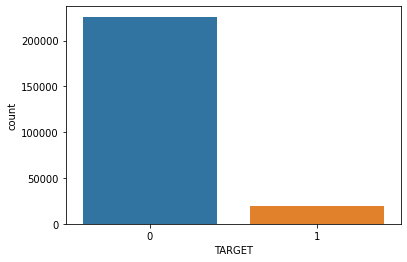

In [7]:
sns.countplot(x=df_raw["TARGET"])
plt.show()

In [8]:
filter_features(df_num, 0.5).isna().sum().sort_values(ascending=True)

TARGET                               0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
HOUR_APPR_PROCESS_START              0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
DAYS_LAST_PHONE_CHANGE               1
CNT_FAM_MEMBERS                      1
AMT_ANNUITY                         10
AMT_GOODS_PRICE                    226
EXT_SOURCE_2                       544
DEF_60_CNT_SOCIAL_CIRCLE           813
OBS_60_CNT_SOCIAL_CIRCLE           813
DEF_30_CNT_SOCIAL_CIRCLE           813
OBS_30_CNT_SOCIAL_CIRCLE           813
AMT_REQ_CREDIT_BUREAU_MON        33172
AMT_REQ_CREDIT_BUREAU_WEEK       33172
AMT_REQ_CREDIT_BUREAU_DAY        33172
AMT_REQ_CREDIT_BUREAU_HOUR       33172
AMT_REQ_CREDIT_BUREAU_YEAR       33172
AMT_REQ_CREDIT_BUREAU_QRT        33172
EXT_SOURCE_3             

In [9]:
# df_corr = df_raw.corr()
# plt.figure(figsize=(30, 30))
# sns.heatmap(df_corr, vmin=-1, vmax=1, linewidths=0.5)

In [10]:
# Maternity Leave na coluna NAME_INCOME_TYPE pode criar um viés contra mulheres grávidas
# WEEKDAY_APPR_PROCESS_START talvez tenha um grande custo computacional

## Análise das variáveis Categóricas

In [11]:
df_cat = df_raw[cat_features]

In [12]:
df_cat.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,FLAG_MOBIL,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,FLAG_DOCUMENT_6,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,REG_REGION_NOT_LIVE_REGION,FLAG_DOCUMENT_2,FLAG_EMP_PHONE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,FLAG_DOCUMENT_3,FLAG_EMAIL,FLAG_PHONE,FLAG_CONT_MOBILE,FLAG_WORK_PHONE,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT
0,Cash loans,F,N,N,Unaccompanied,Working,Incomplete higher,Single / not married,House / apartment,Core staff,FRIDAY,Trade: type 2,reg oper account,block of flats,Block,No,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,1,1,2,2
1,Cash loans,F,N,N,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,High skill tech staff,MONDAY,Business Entity Type 3,reg oper account,block of flats,Block,No,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,2,2
2,Cash loans,M,Y,N,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Managers,THURSDAY,Business Entity Type 1,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,2,2
3,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,NaN,TUESDAY,XNA,NaN,NaN,NaN,No,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1
4,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Separated,House / apartment,Laborers,FRIDAY,Transport: type 4,reg oper account,block of flats,Panel,No,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,2,2


## Pipeline inicial

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.metrics import roc_auc_score, classification_report

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
 
from sklearn.ensemble import RandomForestClassifier

In [14]:
features_cat = cat_features
features_num = list(df_num.columns[1:])

In [15]:
X= df_raw.drop(columns='TARGET')
y= df_raw['TARGET']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify= y)

In [17]:
df_train = pd.concat([X_train, y_train], axis=1)
df_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
11255,141133,Cash loans,M,N,Y,0,81000.0,625536.0,25245.0,540000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.031329,-20288,-2131,-1687.0,-3499,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,7,0,0,0,0,0,0,Security Ministries,NaN,0.437435,0.766234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-1682.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0,0
204263,315142,Cash loans,M,Y,Y,0,90000.0,436032.0,15660.0,360000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.026392,-14072,-4550,-7758.0,-4642,20.0,1,1,1,1,1,1,Security staff,1.0,2,2,FRIDAY,12,0,0,0,0,0,0,Business Entity Type 2,0.092763,0.425174,0.634706,0.0227,NaN,0.9876,NaN,NaN,0.00,0.1034,0.0417,NaN,NaN,NaN,0.0177,NaN,0.0000,0.0231,NaN,0.9876,NaN,NaN,0.0000,0.1034,0.0417,NaN,NaN,NaN,0.0184,NaN,0.0000,0.0229,NaN,0.9876,NaN,NaN,0.00,0.1034,0.0417,NaN,NaN,NaN,0.0180,NaN,0.0000,NaN,block of flats,0.0139,"Stone, brick",No,7.0,0.0,7.0,0.0,-2136.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,0
16425,419388,Cash loans,F,N,N,0,270000.0,539100.0,29245.5,450000.0,Family,Working,Higher education,Married,House / apartment,0.032561,-15384,-2974,-9520.0,-1007,NaN,1,1,1,1,1,1,High skill tech staff,2.0,1,1,TUESDAY,14,0,0,0,0,0,0,Other,0.595983,0.557267,0.484851,0.0619,NaN,0.9757,NaN,NaN,NaN,0.1034,0.1667,NaN,NaN,NaN,0.0501,NaN,NaN,0.0630,NaN,0.9757,NaN,NaN,NaN,0.1034,0.1667,NaN,NaN,NaN,0.0522,NaN,NaN,0.0625,NaN,0.9757,NaN,NaN,NaN,0.1034,0.1667,NaN,NaN,NaN,0.0510,NaN,NaN,NaN,block of flats,0.0426,"Stone, brick",No,0.0,0.0,0.0,0.0,-543.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [18]:
value_counts = df_train['TARGET'].value_counts()
print(value_counts)

numero_de_y0 = value_counts[1]
print(numero_de_y0)

0    169528
1     14978
Name: TARGET, dtype: int64
14978


In [19]:
df_train_1 = df_train[df_train['TARGET'] == 1].copy()
df_train_0 = df_train[df_train['TARGET'] == 0].sample(n=numero_de_y0, replace=False)

In [20]:
df_bal_train = pd.concat([df_train_0, df_train_1], axis=0)

In [21]:
df_bal_train['TARGET'].value_counts()

0    14978
1    14978
Name: TARGET, dtype: int64

In [22]:
X_train = df_bal_train.drop(columns=['TARGET'], axis=1)
y_train = df_bal_train['TARGET']

In [23]:
# filling and standardizing numeric values
pipe_tr_features_num = Pipeline([
    ('tr_imput_mean', SimpleImputer(strategy='mean')),
    ('tr_min_max', StandardScaler())
])

In [24]:
# filling categorical values and applying OneHotEnconder
pipe_tr_features_cat = Pipeline([
    ('tr_input_frequent', SimpleImputer(strategy='most_frequent')),
    ('tr_dummy', OneHotEncoder(drop = 'first', handle_unknown='ignore'))
])

In [25]:
pre_processor = ColumnTransformer([
    ('tr_num', pipe_tr_features_num, features_num),
    ('tr_cat', pipe_tr_features_cat, features_cat)
])

In [26]:
pipe_final = Pipeline([
    ('pre_processor', pre_processor),
    ('est', RandomForestClassifier(random_state=42))
])

In [27]:
pipe_final.fit(X_train, y_train)

Pipeline(steps=[('pre_processor',
                 ColumnTransformer(transformers=[('tr_num',
                                                  Pipeline(steps=[('tr_imput_mean',
                                                                   SimpleImputer()),
                                                                  ('tr_min_max',
                                                                   StandardScaler())]),
                                                  ['CNT_CHILDREN',
                                                   'AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT', 'AMT_ANNUITY',
                                                   'AMT_GOODS_PRICE',
                                                   'REGION_POPULATION_RELATIVE',
                                                   'DAYS_BIRTH',
                                                   'DAYS_EMPLOYED',
                                                   'DAYS_REGISTRATION',
                                                   'DAYS_ID_PUBLISH',
                                                   'OWN_CAR_AGE',
                                                   '...
                                                   'WALLSMATERIAL_MODE',
                                                   'EMERGENCYSTATE_MODE',
                                                   'FLAG_MOBIL',
                                                   'FLAG_DOCUMENT_7',
                                                   'FLAG_DOCUMENT_8',
                                                   'FLAG_DOCUMENT_9',
                                                   'FLAG_DOCUMENT_10',
                                                   'FLAG_DOCUMENT_11',
                                                   'FLAG_DOCUMENT_12',
                                                   'FLAG_DOCUMENT_13',
                                                   'FLAG_DOCUMENT_14',
                                                   'FLAG_DOCUMENT_15',
                                                   'FLAG_DOCUMENT_16',
                                                   'FLAG_DOCUMENT_17',
                                                   'FLAG_DOCUMENT_18',
                                                   'FLAG_DOCUMENT_19', ...])])),
                ('est', RandomForestClassifier(random_state=42))])

In [28]:
len(pipe_final.feature_names_in_)

121

In [29]:
pipe_final._get_params

<bound method _BaseComposition._get_params of Pipeline(steps=[('pre_processor',
                 ColumnTransformer(transformers=[('tr_num',
                                                  Pipeline(steps=[('tr_imput_mean',
                                                                   SimpleImputer()),
                                                                  ('tr_min_max',
                                                                   StandardScaler())]),
                                                  ['CNT_CHILDREN',
                                                   'AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT', 'AMT_ANNUITY',
                                                   'AMT_GOODS_PRICE',
                                                   'REGION_POPULATION_RELATIVE',
                                                   'DAYS_BIRTH',
                                                   'DAYS_EMPLOYED',
                    

In [30]:
y_pred = pipe_final.predict(X_test)

C:\Users\grego\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [1, 5, 22] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [31]:
roc_auc_score(y_test, y_pred)

0.6738517462305287

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.70      0.81     56510
           1       0.16      0.65      0.26      4992

    accuracy                           0.69     61502
   macro avg       0.56      0.67      0.53     61502
weighted avg       0.89      0.69      0.76     61502



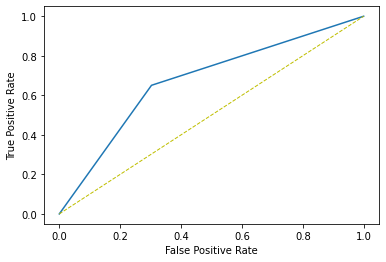

In [33]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

fpr, tpr, thr = roc_curve(y_test, y_pred)
RocCurveDisplay(fpr = fpr, tpr = tpr).plot()
plt.plot([0,1], [0,1], '--', color = 'y', linewidth= 1)


## Fazendo Random Search

In [34]:
from sklearn.model_selection import RandomizedSearchCV

In [35]:
espaco_hiperparametros= {
    'est__n_estimators': [200, 300, 400],
    'est__max_depth': [20, 30, 40]
}

n_cv = 15

15

In [36]:
random_search = RandomizedSearchCV(pipe_final, param_distributions= espaco_hiperparametros, scoring='roc_auc', cv=n_cv, verbose=2, n_jobs=15)

In [37]:
random_search.fit(X_train, y_train)

C:\Users\grego\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 15 folds for each of 9 candidates, totalling 135 fits


RandomizedSearchCV(cv=15,
                   estimator=Pipeline(steps=[('pre_processor',
                                              ColumnTransformer(transformers=[('tr_num',
                                                                               Pipeline(steps=[('tr_imput_mean',
                                                                                                SimpleImputer()),
                                                                                               ('tr_min_max',
                                                                                                StandardScaler())]),
                                                                               ['CNT_CHILDREN',
                                                                                'AMT_INCOME_TOTAL',
                                                                                'AMT_CREDIT',
                                                                                'AMT_ANNUITY',
                                                                                'AMT_GOODS_PRICE',
                                                                                'REGION_POPULATION_RELATIVE',
                                                                                'DAYS_BIRTH',
                                                                                'DAYS_EMPLOYED',
                                                                                'DAYS_REGISTRATION...
                                                                                'FLAG_DOCUMENT_11',
                                                                                'FLAG_DOCUMENT_12',
                                                                                'FLAG_DOCUMENT_13',
                                                                                'FLAG_DOCUMENT_14',
                                                                                'FLAG_DOCUMENT_15',
                                                                                'FLAG_DOCUMENT_16',
                                                                                'FLAG_DOCUMENT_17',
                                                                                'FLAG_DOCUMENT_18',
                                                                                'FLAG_DOCUMENT_19', ...])])),
                                             ('est',
                                              RandomForestClassifier(random_state=42))]),
                   n_jobs=15,
                   param_distributions={'est__max_depth': [20, 30, 40],
                                        'est__n_estimators': [200, 300, 400]},
                   scoring='roc_auc', verbose=2)

In [38]:
random_search.best_score_

0.7407583514957422

In [39]:
random_search.best_params_

{'est__n_estimators': 400, 'est__max_depth': 20}

In [40]:
y_pred = random_search.best_estimator_.predict(X_test)

C:\Users\grego\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [1, 5, 22] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [41]:
roc_auc_score(y_test, y_pred)

0.6791280807742219

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.69      0.80     56510
           1       0.16      0.67      0.26      4992

    accuracy                           0.69     61502
   macro avg       0.56      0.68      0.53     61502
weighted avg       0.89      0.69      0.76     61502



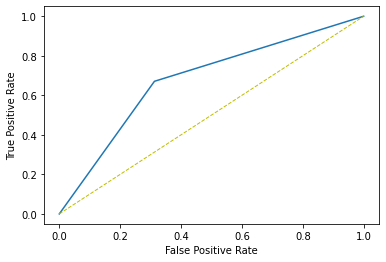

In [43]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

fpr, tpr, thr = roc_curve(y_test, y_pred)
RocCurveDisplay(fpr = fpr, tpr = tpr).plot()
plt.plot([0,1], [0,1], '--', color = 'y', linewidth= 1)

In [44]:
df_result = pd.DataFrame(random_search.cv_results_)
df_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_est__n_estimators,param_est__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
0,34.387298,0.126151,0.488109,0.037507,200,20,"{'est__n_estimators': 200, 'est__max_depth': 20}",0.743137,0.737757,0.745979,0.739786,0.739357,0.743066,0.714133,0.740331,0.737801,0.743544,0.715285,0.735763,0.747840,0.750967,0.741325,0.738405,0.010070,5
1,50.479998,0.240103,0.745834,0.062611,300,20,"{'est__n_estimators': 300, 'est__max_depth': 20}",0.745263,0.739835,0.747072,0.741890,0.740183,0.744375,0.716249,0.742354,0.738989,0.742876,0.716889,0.735879,0.748455,0.751910,0.743611,0.739722,0.009851,2
2,66.896437,0.297433,1.009695,0.100001,400,20,"{'est__n_estimators': 400, 'est__max_depth': 20}",0.746377,0.740910,0.748255,0.742492,0.740578,0.745945,0.716787,0.743481,0.739988,0.744131,0.716884,0.736280,0.749188,0.753980,0.746097,0.740758,0.010251,1
3,35.046246,0.100100,0.625608,0.089268,200,30,"{'est__n_estimators': 200, 'est__max_depth': 30}",0.743812,0.738056,0.743911,0.739052,0.734731,0.741635,0.711331,0.739400,0.729876,0.745030,0.714356,0.726043,0.747721,0.754842,0.744131,0.736928,0.011613,8
4,52.029349,0.279503,0.862128,0.123460,300,30,"{'est__n_estimators': 300, 'est__max_depth': 30}",0.744335,0.737616,0.746288,0.740386,0.737094,0.744835,0.714648,0.740890,0.733386,0.744041,0.712678,0.727907,0.749127,0.754210,0.745449,0.738193,0.011426,6
5,68.915827,0.370816,1.153193,0.156333,400,30,"{'est__n_estimators': 400, 'est__max_depth': 30}",0.744976,0.739296,0.746840,0.741876,0.738458,0.745721,0.714529,0.742535,0.735968,0.746023,0.714113,0.728868,0.748851,0.755602,0.746969,0.739375,0.011480,3
6,35.083522,0.184380,0.600469,0.074582,200,40,"{'est__n_estimators': 200, 'est__max_depth': 40}",0.736615,0.738785,0.743444,0.741165,0.740279,0.737411,0.712681,0.737772,0.735985,0.743136,0.714045,0.723114,0.743442,0.754023,0.743919,0.736388,0.010946,9
7,52.487184,1.017417,0.827053,0.098293,300,40,"{'est__n_estimators': 300, 'est__max_depth': 40}",0.740780,0.741654,0.745040,0.740368,0.741563,0.740060,0.715938,0.739976,0.738730,0.743065,0.713273,0.724899,0.745312,0.753237,0.742122,0.737735,0.010629,7
8,68.787264,0.579683,0.632476,0.222399,400,40,"{'est__n_estimators': 400, 'est__max_depth': 40}",0.742514,0.740731,0.746171,0.741644,0.742655,0.742143,0.717457,0.742226,0.738997,0.744013,0.714779,0.728196,0.747848,0.755949,0.742849,0.739211,0.010582,4
